Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data and visualize them

In [3]:
stock_df = pd.read_csv(r"C:\Learning\PhD\Nelinearni_filtrace\CEZ.csv")
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213
...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923


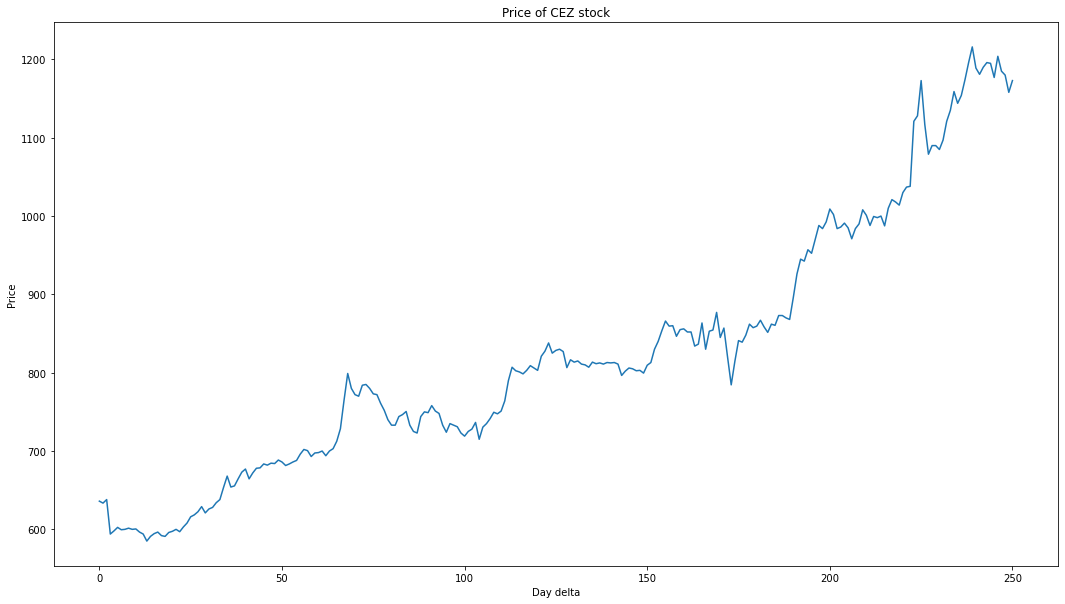

In [4]:
plt.figure(figsize=(18,10))
plt.plot(stock_df["Close"])
plt.title("Price of CEZ stock")
plt.ylabel("Price")
plt.xlabel("Day delta")
plt.show()

For the data we would like to estimate growth, which means corelation in time to price. For that purpose we asume formula.
<img src="images/lin_form.png"  width = 200 height=100 />
We assume noise estimation equals to 0.
<img src="images/noise_estimation.png" width = 200 height=100 />
Our equation can be written as:
<img src="images/Recursive_LSE_formula.png" width = 200 height=100 />
From this we can state our error that is equal to optimal x minus our estimate
<img src="images/Recursive_LSE_error.png" width = 200 height=100 />
From this simple formula we need to derive estimation error which looks like this. Its basically only puting formula for yk and multiplying pieces of formula. 
<img src="images/Recursive_LSE_estimation_error.png" width = 300 height=150 />
From our estimation error matrix, we would like to get covariance matrix Pk. That means we use same formula of e*eT to get power of 2. This give us very complicated formula as bellow
<img src="images/Recursive_LSE_covariance_before.png" width = 300 height=150 />
And after simplification, where we know that vk is equal to 0, vk*vkT is equal to Rk and ek-1*ek-1 is equal to Pk-1, we get following formula. This is our covariance matrix Pk
<img src="images/Recursive_LSE_covariance_after.png" width = 300 height=150 />
Now we need to get our gain matrix Kk, that means partial derivative in respect to Kk, which equals to 0. That brings us following fomrula. 
<img src="images/Recursive_LSE_gain_derivative.png" width = 300 height=150 />
Which after simplification gives us final formula for gain matrix
<img src="images/Recursive_LSE_gain_matrix.png" width = 400 height=200 />
So, we have all 3 formulas. Gain matrix Kk, parameters of xk and covariance matrix of pk. 
<img src="images/Recursive_LSE_all_formulas.png" width = 400 height=200 />

In our case for H measumerement we will use delta of time, which is for us 1 day or we can use as increase of 1 per record and we would like to be predicting close price. We decided to measure certainty of measurement sigma^2 based on date of measurement, therefore we need to calculate sigma and later apply it.

In [5]:
stock_df["DayOfWeek"] = pd.to_datetime(stock_df["Date"]).dt.dayofweek
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277,0
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918,1
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018,2
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889,3
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213,4
...,...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218,0
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357,1
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733,2
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923,3


In [6]:
stock_df["SigmaSquared"] = 0
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,SigmaSquared
0,2021-06-28,635.0,640.0,634.0,636.0,584.163025,179277,0,0
1,2021-06-29,639.0,639.0,633.5,633.5,581.866760,284918,1,0
2,2021-06-30,635.5,638.5,634.5,638.0,586.000000,1078018,2,0
3,2021-07-01,594.0,598.5,589.0,594.0,594.000000,436889,3,0
4,2021-07-02,596.0,599.0,595.0,598.0,598.000000,143213,4,0
...,...,...,...,...,...,...,...,...,...
246,2022-06-20,1178.0,1208.0,1178.0,1204.0,1204.000000,249218,0,0
247,2022-06-21,1202.0,1205.0,1182.0,1185.0,1185.000000,157357,1,0
248,2022-06-22,1185.0,1187.0,1165.0,1180.0,1180.000000,226733,2,0
249,2022-06-23,1180.0,1182.0,1119.0,1158.0,1158.000000,428923,3,0


In [7]:
for day in stock_df["DayOfWeek"].unique():
    sigma_squared = (stock_df[stock_df["DayOfWeek"]==day]["Close"]-stock_df[stock_df["DayOfWeek"]==day]["Open"]).var()
    stock_df.loc[stock_df["DayOfWeek"]==day,"SigmaSquared"] =sigma_squared
stock_df["SigmaSquared"].unique()

array([175.45928571, 142.90010204, 224.99078431, 102.68254902,
       168.86267007])

In [8]:
stock_df = stock_df.reset_index()[["index","Close","SigmaSquared"]]
stock_df

,index,Close,SigmaSquared
0,0,636.0,175.459286
1,1,633.5,142.900102
2,2,638.0,224.990784
3,3,594.0,102.682549
4,4,598.0,168.862670
...,...,...,...
246,246,1204.0,175.459286
247,247,1185.0,142.900102
248,248,1180.0,224.990784
249,249,1158.0,102.682549


In [9]:
# Define variables
H = np.ones((stock_df.shape[0],2))
H[:,1] = stock_df["index"]
y = np.array(stock_df["Close"])
R = np.array(stock_df["SigmaSquared"])

Implementation of Recursive LSE with prediction for each step

In [10]:
class RecursiveLeastSquares(object):
     
    # x0 - initial estimate used to initialize the estimator
    # P0 - initial estimation error covariance matrix
    # R  - covariance matrix of the measurement noise
    def __init__(self,x0,P0,R0):
         
        # this variable is used to track the current time step k of the estimator 
        # after every time step arrives, this variables increases for one 
        # in this way, we can track the number of variblaes
        self.currentTimeStep=0
                   
        # this list is used to store the estimates xk starting from the initial estimate 
        self.X=[]
        self.X.append(x0)
          
        # this list is used to store the estimation error covariance matrices Pk
        self.P=[]
        self.P.append(P0)
        
        # this is list of used uncertainty
        self.R=[]
        self.R.append(R0)
       
        # this list is used to store the gain matrices Kk
        self.K=[]
        
        # predictions of y 
        self.y_pred = []
        
        # real values of y
        self.y_real = []
          
        # this list is used to store estimation error vectors
        self.l2e=[]
     
    def predict(self, y, H, R):
        I=np.identity(2)
        # First we calculate gain matrix
        K_inverse_part = np.linalg.inv(np.matmul(np.matmul(H,self.P[-1]), H.T)+R)
        K_first_part = np.matmul(self.P[-1],H.T)
        K_k = np.matmul(K_first_part, K_inverse_part)
        self.K.append(K_k)
        # Then calculate X 
        X_t = self.X[-1] + np.matmul(K_k, y-np.matmul(H,self.X[-1]))
        self.X.append(X_t)
        # Calculate current y and its error
        y_t = np.matmul(H,X_t)
        self.y_pred.append(y_t)
        self.y_real.append(y)
        self.l2e.append(np.power((y_t-y),2))
        # Lastly calculate Pk
        P_k = np.matmul(np.matmul(I-np.matmul(K_k,H),self.P[-1]),
                        np.transpose(I-np.matmul(K_k,H)))+R*np.matmul(K_k,np.transpose(K_k))
        # Alternative, which is shorter
        # P_k_2 = np.matmul(I - np.matmul(K_k,H), self.P[self.currentTimeStep])
        self.P.append(P_k)
        # Add to currentTimeStep +1
        self.currentTimeStep = self.currentTimeStep+1

Define Recursive LSE

In [11]:
x0 = np.ones((2,1))
P0 = 100*np.eye(2,2)
R0 = 0.5*np.eye(1,1)

RLS=RecursiveLeastSquares(x0,P0,R0)

Run and visualize predictions

In [115]:
for yi, Hi, Ri in zip(y, H, R):
    RLS.predict(np.array(yi).reshape(1,1), Hi.reshape(1,-1), np.array(Ri).reshape(1,1))

In [116]:
len(RLS.K)

251

In [121]:
RLS.K[0]

array([[0.36303006],
       [0.        ]])

In [117]:
len(RLS.P)

252

In [118]:
len(RLS.X)

252

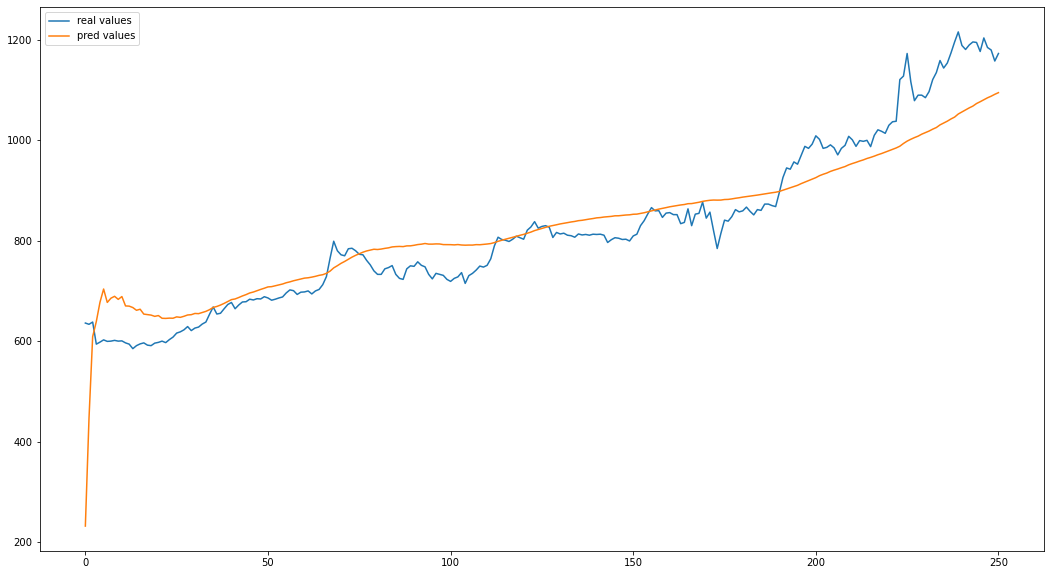

In [127]:
plt.figure(figsize=(18,10))
plt.plot(np.array(RLS.y_real).reshape(-1,1), label = "real values")
plt.plot(np.array(RLS.y_pred).reshape(-1,1), label = "pred values")
plt.legend()
plt.show()

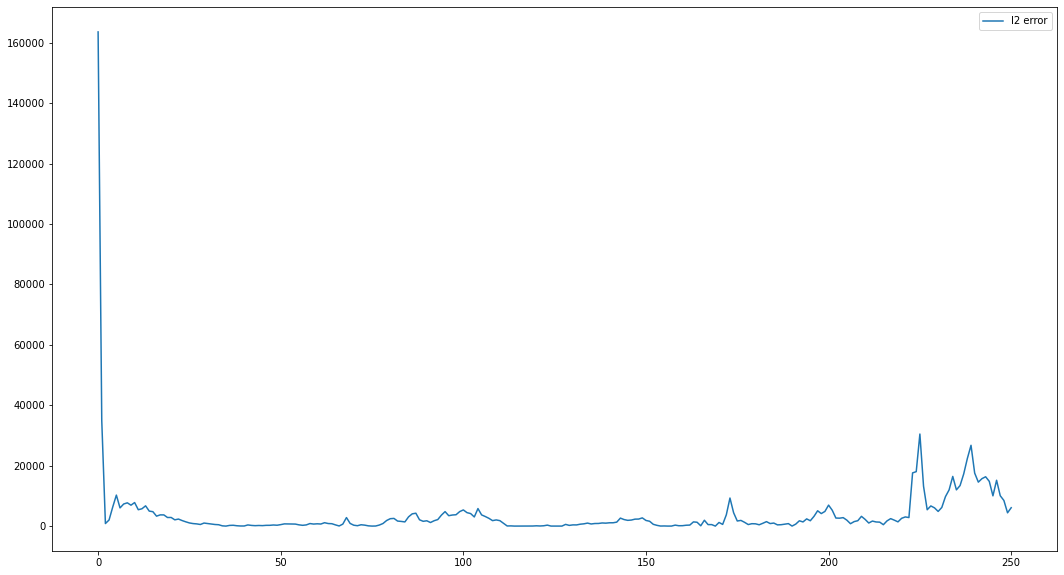

In [128]:
plt.figure(figsize=(18,10))
plt.plot(np.array(RLS.l2e).reshape(-1,1), label = "l2 error")
plt.legend()
plt.show()

Predictions from last parameter

In [129]:
last_x = RLS.X[-1]
last_x

array([[544.68996115],
       [  2.20120236]])

In [130]:
predicted_y_from_last_x = []
for Hi in H:
    y_t = np.matmul(Hi,last_x)
    predicted_y_from_last_x.append(y_t)

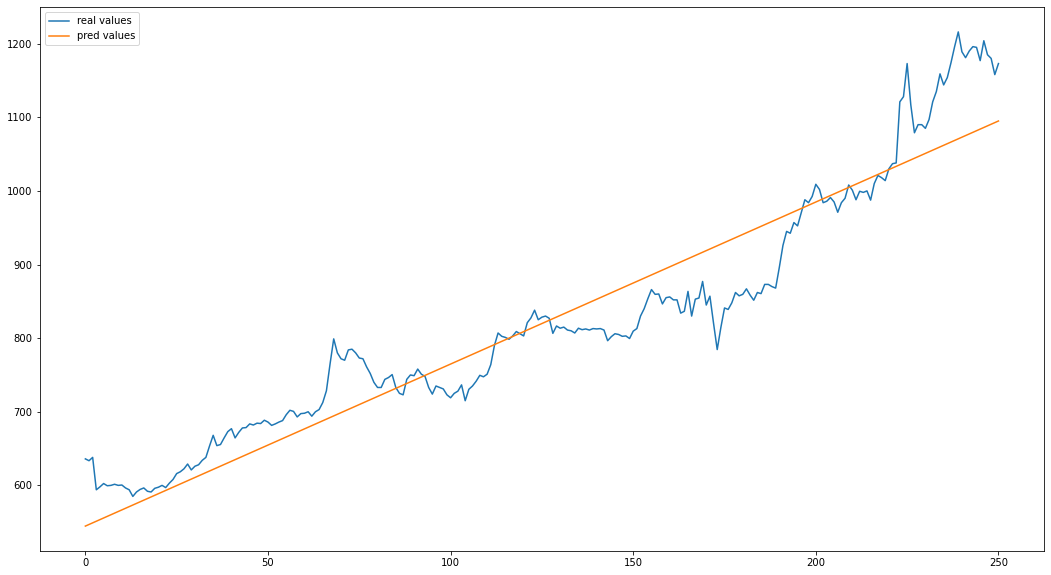

In [131]:
plt.figure(figsize=(18,10))
plt.plot(np.array(RLS.y_real).reshape(-1,1), label = "real values")
plt.plot(np.array(predicted_y_from_last_x).reshape(-1,1), label = "pred values")
plt.legend()
plt.show()

Handwriten
<img src="images/Recursive_LSE_1.jpg" width = 600 height=400 />
<img src="images/Recursive_LSE_2.jpg" width = 600 height=400 />